# Ordinary Least Squares

This notebook explains the Ordinary Least Squares (OLS) method. 

The Franke function is used to produce the data:

$$y(x_1,x_2) = \frac{3}{4}\exp{(-\frac{(9x_1-2)^2}{4}-\frac{(9x_2-2)^2}{4})} + \frac{3}{4}\exp{(-\frac{(9x_1+1)^2}{49}-\frac{(9x_2+1)}{10})} + \frac{1}{2}\exp{(-\frac{(9x_1-7)^2}{4}-\frac{(9x_2-3)^2}{4})} - \frac{1}{5}\exp{(-(9x_1-4)^2-(9x_2-7)^2 )}$$

and $x_1, x_2 \in [0,1]$.




## Plot Franke function

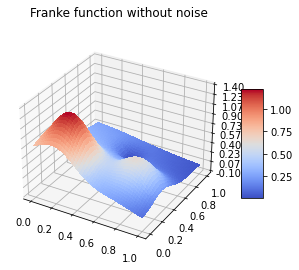

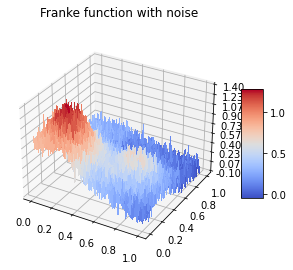

In [13]:
from regression_analysis.utils import create_data_franke, create_plots

# Generate data without noise
x1, x2, y = create_data_franke.generate_data(noisy=False, points=100)

# Generate data with noise
_, _, y_noise = create_data_franke.generate_data(noisy=True, noise_variance=0.1, points=100)

# Plot data
create_plots.make_3d_surface_plot(x1, x2, y, title="Franke function without noise")
create_plots.make_3d_surface_plot(x1, x2, y_noise, title="Franke function with noise")

## Calculate Ordinary Least Squares for order 1
We want to find the best $\beta_{OLS}$ such that $\tilde{y}=D\beta_{OLS}$ where $D$ is the design matrix. $D$'s columns are different combination of the input variables $x_1$ and $x_2$. 
For example when we want to fit a plynomial with the order 2 to $y$ the design matrix has the columns: $1, x, y, xy, x^2, y^2$. The parameter $\beta_{OLS}$ is defined as: $$\beta_{OLS}:= (D^T D)^{-1}D^T y$$

[ 0.98860268 -0.66594379 -0.50052864]


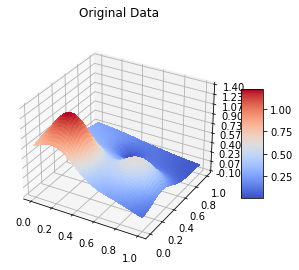

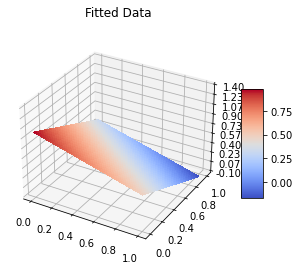

In [18]:
from regression_analysis.fit_model import ordinary_least_squares

# Calculate beta and the response variable y_tilde for ordinary least squares.
beta_OLS, y_tilde_OLS = ordinary_least_squares.calculate_OLS(x1, x2, y, order=1)
print(beta_OLS)

# Plot y_tilde
create_plots.make_3d_surface_plot(x1, x2, y, title="Original Data")
create_plots.make_3d_surface_plot(x1, x2, y_tilde_OLS, title="Fitted Data")

## Perform OLS for several orders

noise=False, train_frac=0.8,cross_val=False, num_fold=0, bootstrap=False 

MSE train data: [[0.01532442 0.01085848 0.00526209 0.00270349 0.00134972]]
MSE test data: [[0.01739664 0.01454643 0.00524694 0.00298408 0.00163121]]
R2 train data: [[0.72440404 0.79221318 0.90793605 0.95231471 0.9750852 ]]
R2 test data: [[0.68273826 0.78274952 0.89219618 0.94048956 0.97313925]]


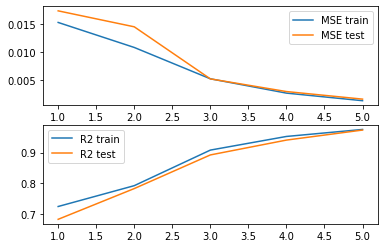

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Fit model for different polynomial
max_order = 5
orders = range(1, max_order+1)
MSE_train = np.empty([1, max_order])
R2_train = np.empty([1, max_order])
MSE_test = np.empty([1, max_order])
R2_test = np.empty([1, max_order])

for i, order in enumerate(orders):
    _, _, _, MSE_train[:, i], MSE_test[:, i], R2_train[:, i], R2_test[:, i] = ordinary_least_squares.perform_OLS(x1, x2, y, order,
                                                                                                                 train_frac=0.8,
                                                                                                                 cross_val=False,
                                                                                                                 num_fold=0,
                                                                                                                 bootstrap=False)

# Plot errors
axes_1 = np.array(orders)
args = (MSE_train, MSE_test, R2_train, R2_test)
axes_2 = np.concatenate(args, axis=0)

line_lab = ['MSE train', 'MSE test', 'R2 train', 'R2 test']

fig_errors = plt.figure()
create_plots.make_multi_line_plot(axes_1, axes_2[:2, :], line_lab[:2], fig_errors, 211)
create_plots.make_multi_line_plot(axes_1, axes_2[2:, :], line_lab[2:], fig_errors, 212)

print("noise=False, train_frac=0.8,cross_val=False, num_fold=0, bootstrap=False \n")
print("MSE train data: " +  str(MSE_train))
print("MSE test data: " +  str(MSE_test))
print("R2 train data: " +  str(R2_train))
print("R2 test data: " +  str(R2_test))